In [114]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score,cross_val_predict
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [5]:
mnist=fetch_openml('mnist_784',as_frame=False)

In [8]:
x=mnist['data']

In [10]:
x.shape

(70000, 784)

In [11]:
y=mnist['target']

In [12]:
y.shape

(70000,)

In [17]:
def plot_digit(image_data):
    image=image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')

In [15]:
x[0].shape

(784,)

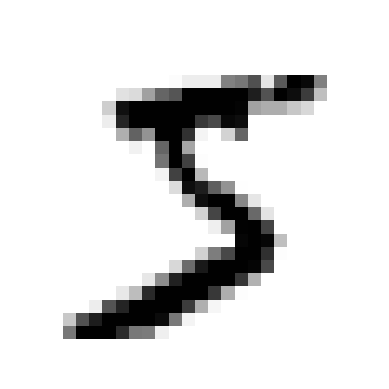

In [18]:
plot_digit(x[0])

In [19]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [ ]:
##The problem is only try to identify one digit eg.:5. The binary classifier to classify into two classes as 5 and non-5.

In [22]:
y_train_5=(y_train=='5')

In [23]:
y_test_5=(y_test=='5')

In [25]:
sgd_clf=SGDClassifier(random_state=42)

In [26]:
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [27]:
sgd_clf.predict(x_test)

array([False, False, False, ..., False,  True, False])

In [35]:
sgd_clf.predict(x[[0]])

array([ True])

In [43]:
y_scores=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method='decision_function')

In [45]:
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [87]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [88]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [89]:
thresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

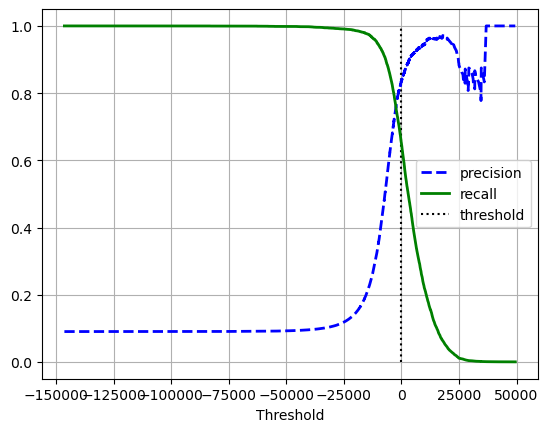

In [59]:
plt.plot(thresholds,precisions[:-1],'b--',label='precision',linewidth=2)
plt.plot(thresholds,recalls[:-1],'g-',label='recall',linewidth=2)
plt.vlines(0,0,1.0,'k','dotted',label='threshold')
plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.show()

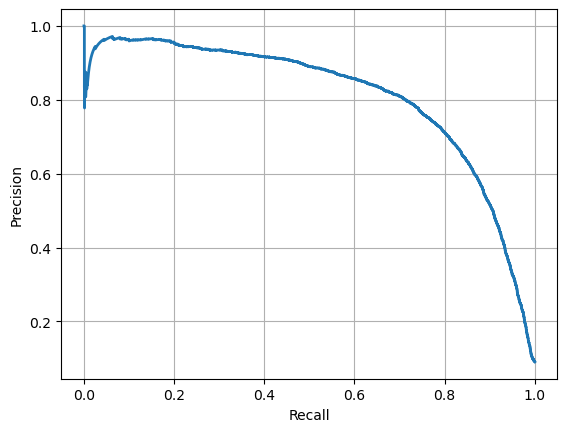

In [69]:
plt.plot(recalls,precisions,linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()


In [ ]:
#suppose if we need lowest threshold for atleast 90% precision

In [81]:
idx_for_90_precisions=(precisions >= 0.90).argmax()

In [83]:
threshold_for_90_precision=thresholds[idx_for_90_precisions]

In [84]:
threshold_for_90_precision

3370.0194991439557

In [92]:
y_train_pred_90=(y_scores>=threshold_for_90_precision)

In [94]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [96]:
recall_at_90_precision=recall_score(y_train_5,y_train_pred_90)

# The ROC(Receiver Operating Characteristic) curve

In [ ]:
#This plots true positive rate TPR (another name for recall) against false postive rate FPR (also called fall-out)
#false positive rate is the ratio of nagative instances that are incorrectly classified as positive

In [98]:
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

In [99]:
tpr

array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [100]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
       1.        ])

In [101]:
thresholds

array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

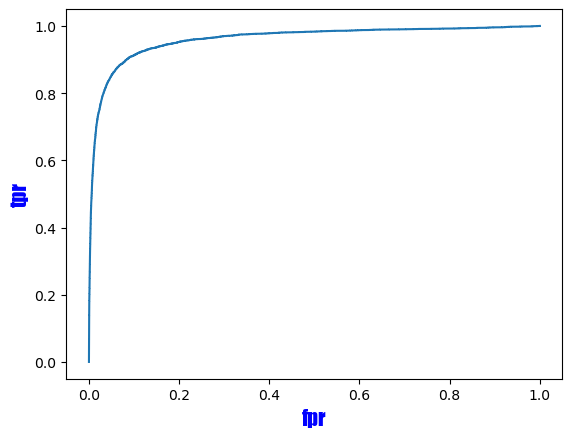

In [108]:
plt.plot(fpr,tpr)
plt.xlabel('fpr',fontdict={'family':'fantasy','color':'blue','size':15})
plt.ylabel('tpr',fontdict={'family':'fantasy','color':'blue','size':15})
plt.show()

In [109]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
       1.        ])

In [110]:
thresholds

array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

In [112]:
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [113]:
#We should prefer PR curve whenever the positive class is rare or when you care more about the false positives than the 
#false negatives. Otherwise use ROC curve.

In [115]:
forest_clf=RandomForestClassifier(random_state=42)

In [116]:
#Random forest does not have a decision_function() method due to the way it works. Luckily it has predict_proba() method 
#that returns class probabilities for each instance.

In [119]:
y_probas_forest=cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method='predict_proba')

In [127]:
y_probas_forest[:5]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [126]:
y_train_5[:5]

array([ True, False, False, False, False])

In [128]:
#From above two cells model predicts that probability for True is 0.89 for first observation as it is actually True and etc.

In [131]:
y_scores_forest=y_probas_forest[:,1]

In [134]:
precisions_forest,recalls_forest,thresholds_forest=precision_recall_curve(y_train_5,y_scores_forest)

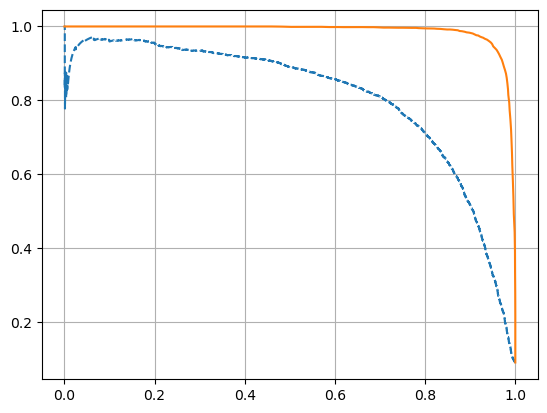

In [137]:
plt.plot(recalls,precisions,'--',label='SGD')
plt.plot(recalls_forest,precisions_forest,'-',label='Randomforest')
plt.grid()
plt.show()

In [139]:
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

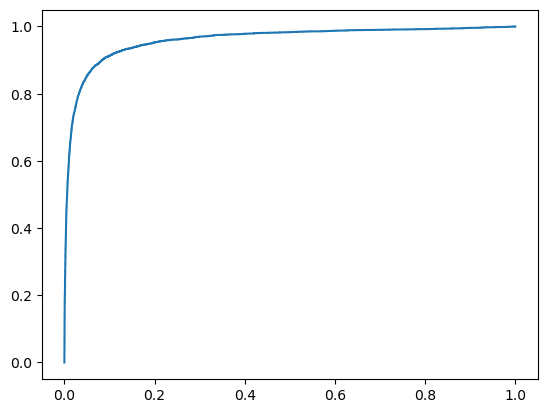

In [140]:
plt.plot(fpr,tpr)
plt.show()

In [141]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145